In [8]:

import sqlite3
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
import os
import itertools

In [9]:
from helpers import *

In [10]:
data = pd.read_csv('Global_Superstore_clean1.txt', delimiter='\t')

In [101]:
data['order_date_month'] = data['Order Date'].str[5:7]
data['order_date_day'] = str(data['Order Date'].str[5:7]) + str(data['Order Date'].str[8:10])

In [92]:
newdata = data['Order Date'][2]
newdata

'2011-08-05 00:00:00.000'

In [90]:
data['Order Date']

0        2011-01-07 00:00:00.000
1        2011-01-21 00:00:00.000
2        2011-08-05 00:00:00.000
3        2011-08-05 00:00:00.000
4        2011-09-29 00:00:00.000
                  ...           
51285    2014-12-03 00:00:00.000
51286    2014-12-03 00:00:00.000
51287    2014-12-18 00:00:00.000
51288    2014-12-25 00:00:00.000
51289    2014-12-26 00:00:00.000
Name: Order Date, Length: 51290, dtype: object

In [91]:
data['Order Date'].str[8:10]

0        07
1        21
2        05
3        05
4        29
         ..
51285    03
51286    03
51287    18
51288    25
51289    26
Name: Order Date, Length: 51290, dtype: object

In [102]:
dfTime = data[['Order Date','Ship Date','Order Priority','order_date_day','Year','weeknum','order_date_month']].copy()
dfProduct = data[['Product ID','Product Name','Profit','Sub-Category','Country','Market2','Sales','Discount']].copy()
dfShipping = data[['Product Name','Shipping Cost','Order Priority','Ship Mode','Sales','Profit','order_date_month','Year']].copy()






In [103]:
from sqlalchemy import create_engine
import sqlalchemy
#engine = create_engine('sqlite://', echo=False)
engine = create_engine('sqlite:///retail774.db')

In [104]:
# only need to do this once!
#
data.to_sql('mastertwo', con=engine,if_exists='replace')
#   
#
dfTime.to_sql('timeDimension',con=engine,if_exists='replace')
dfProduct.to_sql('productDimension', con=engine,if_exists='replace')
dfShipping.to_sql('shippingDimension', con=engine,if_exists='replace')

51290

In [8]:

connection = engine.connect()
metadata = sqlalchemy.MetaData()
mastertwo_sql_object = sqlalchemy.Table('mastertwo', metadata, autoload=True, autoload_with=engine)

In [ ]:
timeD_sql_object = sqlalchemy.Table('timeDimension', metadata, autoload=True, autoload_with=engine)

In [ ]:
timeD_sql_object.columns.items()

In [ ]:
table = 'timeDimension'
column= 'Ship Date'
value = 2011
query = 'SELECT * FROM `' + str(table) + '` WHERE `'  + str(column) + '` LIKE '+ '2011%'
#WHERE  col1 LIKE @letter + '%'
query

In [ ]:
res = engine.execute('SELECT * FROM productDimension WHERE weeknum = :val', {'val': 34}).fetchall()

In [111]:
res = dfProduct[dfProduct['Country'] == ''].index
res

Int64Index([], dtype='int64')

In [115]:
res = pd.isna(dfProduct['Country'])
any(res)

False

In [119]:
dfProduct['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: Country, Length: 147, dtype: int64

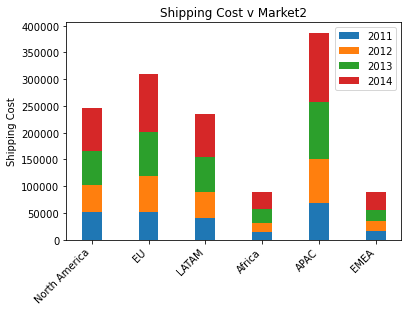

'bar_stacked_2d.png'

In [165]:
get_2D_sum_stacked_bar_graph('Shipping Cost','Market2',engine=engine,show=True)

In [15]:


dfProduct.head()




,Product ID,Product Name,Profit,Sub-Category,Country,Market2,Sales,Discount
0,OFF-PA-10002005,Xerox 225,9.3312,Paper,United States,North America,19,0.0
1,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,Paper,United States,North America,19,0.0
2,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,Paper,United States,North America,21,0.0
3,OFF-PA-10001144,Xerox 1913,53.2608,Paper,United States,North America,111,0.0
4,OFF-PA-10002105,Xerox 223,3.1104,Paper,United States,North America,6,0.0


In [19]:
dfProduct['Country'].value_counts()[:10]

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: Country, dtype: int64

In [ ]:
res = engine.execute('SELECT TOP 10 * FROM productDimension WHERE weeknum = :val', {'val': 34}).fetchall()

In [72]:
column_wanted_top_values = 'Country'
tablename = 'productDimension'
number_wanted = 10

query = 'SELECT `' + str(column_wanted_top_values) + '`, COUNT(*) FROM `' +str(tablename)+ '` GROUP BY `'+str(column_wanted_top_values)+'` Order By COUNT(*) DESC LIMIT '+str(number_wanted)


#res = engine.execute('SELECT Country, COUNT(*) FROM productDimension Group By country Order By COUNT(*) DESC LIMIT 10').fetchall()
print(query)
res = engine.execute(query).fetchall()

SELECT `Country`, COUNT(*) FROM `productDimension` GROUP BY `Country` Order By COUNT(*) DESC LIMIT 10


In [69]:
top_values_names=[]
top_values_values=[]
for item in res:
    top_values_names.append(item[0])
    top_values_values.append(item[1])
top_values_names

['United States',
 'Australia',
 'France',
 'Mexico',
 'Germany',
 'China',
 'United Kingdom',
 'Brazil',
 'India',
 'Indonesia']

In [79]:
column_wanted_top_values_list = ['Product Name','Country']
column_analyze_list = ['Sales','Profit']


column_wanted_top_values = 'Product Name'
column_analyze = 'Sales'
tablename = 'productDimension'
number_wanted = 10
year = 2011



query = 'SELECT `' + str(column_wanted_top_values) + '`, COUNT(*) FROM `' +str(tablename)+ '` GROUP BY `'+str(column_wanted_top_values)+'` Order By COUNT(*) DESC LIMIT '+str(number_wanted)


#res = engine.execute('SELECT Country, COUNT(*) FROM productDimension Group By country Order By COUNT(*) DESC LIMIT 10').fetchall()
print(query)
res = engine.execute(query).fetchall()

top_values_names=[]
top_values_values=[]
for item in res:
    top_values_names.append(item[0])
    top_values_values.append(item[1])



SELECT `Product Name`, COUNT(*) FROM `productDimension` GROUP BY `Product Name` Order By COUNT(*) DESC LIMIT 10


In [171]:
def get_list_product_names_values(list_length=5,engine=engine):
    '''
    if list_length is 0, ALL products are returned
    '''
    product_names=[]
    product_counts=[]
    if list_length==0:
        query = 'SELECT `Product Name`, COUNT(*) FROM productDimension Group By `Product Name` Order By COUNT(*)'
    else:
        query = 'SELECT `Product Name`, COUNT(*) FROM productDimension Group By `Product Name` Order By COUNT(*) DESC LIMIT '+str(list_length)
    res = engine.execute(query).fetchall()
    for item in res:
        product_names.append(item[0])
        product_counts.append(item[1])
    return product_names,product_counts
top_values_names,top_values_values = get_list_product_names_values(list_length=10)

'static\\top_count_chart1.png'

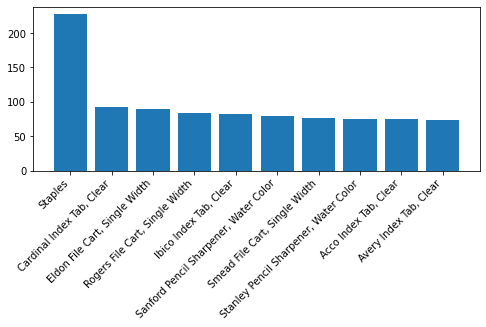

In [185]:
def get_top_items_count_graph(number_of_items=10,show=False):
    top_values_names,top_values_values = get_list_product_names_values(list_length=number_of_items)
    fig = plt.figure(figsize=(8,6))
    plt.xticks(rotation = 45,ha='right') # Rotates X-Axis Ticks by 45-degrees
    fig.subplots_adjust(bottom=0.5)
    plt.bar(top_values_names,top_values_values)
    if show: plt.show()
    filepath = 'static' + '\\top_count_chart1.png'
    plt.savefig(filepath)
    return filepath
get_top_items_count_graph(10)

In [152]:
#query = 'SELECT `Product Name`, COUNT(*) FROM productDimension Group By `Product Name` Order By COUNT(*)'
query = 'SELECT DISTINCT `Product Name` FROM productDimension ORDER BY `Product Name` ASC'
res = engine.execute(query).fetchall()

In [153]:
res

[('"While you Were Out" Message Book, One Form per Page',),
 ('#10 Gummed Flap White Envelopes, 100/Box',),
 ('#10 Self-Seal White Envelopes',),
 ('#10 White Business Envelopes,4 1/8 x 9 1/2',),
 ('#10- 4 1/8" x 9 1/2" Recycled Envelopes',),
 ('#10- 4 1/8" x 9 1/2" Security-Tint Envelopes',),
 ('#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes',),
 ('#6 3/4 Gummed Flap White Envelopes',),
 ('1.7 Cubic Foot Compact "Cube" Office Refrigerators',),
 ('1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',),
 ('12 Colored Short Pencils',),
 ('12-1/2 Diameter Round Wall Clock',),
 ('14-7/8 x 11 Blue Bar Computer Printout Paper',),
 ('2300 Heavy-Duty Transfer File Systems by Perma',),
 ('24 Capacity Maxi Data Binder Racks, Pearl',),
 ('24-Hour Round Wall Clock',),
 ('3.6 Cubic Foot Counter Height Office Refrigerator',),
 ('36X48 HARDFLOOR CHAIRMAT',),
 ('3D Systems Cube Printer, 2nd Generation, Magenta',),
 ('3D Systems Cube Printer, 2nd Generation, Whi

In [132]:
len(dfProduct)

51290

SELECT `Country`, COUNT(*) FROM productDimension WHERE `Product Name`="Avaya 5410 Digital phone"Group By `Country` Order By COUNT(*) DESC LIMIT 10


'static\\country_prod_chart1.png'

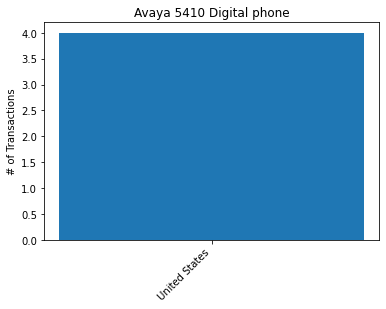

In [162]:
product = 'Hon Bag Chairs, Set of Two'

def get_top_country_counts_chart(product,engine=engine):
    #query = 'SELECT `Country`, COUNT(*) FROM productDimension WHERE `Product Name`="Acco Index Tab, Clear" Group By `Country` Order By COUNT(*) DESC LIMIT 10'

    query = 'SELECT `Country`, COUNT(*) FROM productDimension WHERE `Product Name`='
    query += '\"'
    query += str(product)
    query += '\"'
    query += 'Group By `Country` Order By COUNT(*) DESC LIMIT 10'
    #query = 'SELECT COUNT(*) FROM productDimension WHERE `Product Name`=' +'"'+str(product)+'"'
    print(query)
    res = engine.execute(query).fetchall()
    res

    top_country_list = []
    top_country_values = []
    for item in res:
        top_country_list.append(item[0])
        top_country_values.append(item[1])
    #top_country_values,top_country_list


    filepath = 'static' + '\country_prod_chart1.png'
    plt.title(product)
    plt.ylabel('# of Transactions') 
    plt.xticks(rotation = 45,ha='right') # Rotates X-Axis Ticks by 45-degrees
    plt.bar(top_country_list,top_country_values)
    plt.savefig(filepath)
    return filepath

    


get_top_country_counts_chart(product='Avaya 5410 Digital phone')

In [186]:
data.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name',
       'Discount', 'Market', '记录数', 'Order Date', 'Order ID', 'Order Priority',
       'Product ID', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row ID',
       'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Sub-Category', 'Year', 'Market2', 'weeknum', 'order_date_month'],
      dtype='object')

In [17]:
dfTime.head()

,Order Date,Ship Date,Order Priority,Year,weeknum,order_date_month
0,2011-01-07 00:00:00.000,2011-01-09 00:00:00.000,High,2011,2,01
1,2011-01-21 00:00:00.000,2011-01-26 00:00:00.000,Medium,2011,4,01
2,2011-08-05 00:00:00.000,2011-08-09 00:00:00.000,Medium,2011,32,08
3,2011-08-05 00:00:00.000,2011-08-09 00:00:00.000,Medium,2011,32,08
4,2011-09-29 00:00:00.000,2011-10-03 00:00:00.000,High,2011,40,09


In [18]:
from helpers import *

In [29]:
# short
time_selection = 'weeknum'
column = 'Order Priority'

column_values = []
time_selection_values=[]
query_str = 'SELECT DISTINCT `' + str(column) + '` FROM timeDimension;'
res = engine.execute(query_str).fetchall()
for item in res:
    column_values.append(item[0])

query_str = 'SELECT DISTINCT `' + str(time_selection) + '` FROM timeDimension ORDER BY `' +str(time_selection) + '` ASC'
res = engine.execute(query_str).fetchall()
for item in res:
    time_selection_values.append(item[0])
print(column_values,time_selection_values)   

['High', 'Medium', 'Critical', 'Low'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [40]:
year = 2001
column1=time_selection
column2=column
column1_labels=time_selection_values
column2_labels=column_values
data_dict = {}

for i in range(len(column1_labels)):
    for j in range(len(column2_labels)):
        

        query = 'SELECT COUNT(`' + str(column1) + '`) '
        query += 'FROM timeDimension WHERE `' +str(column2)+'`= \'' + str(column2_labels[j])+ '\' AND `' +str(column1)+'`= \'' + str(column1_labels[i])+'\''
        #print(query)
    
        #print(query)
        res = engine.execute(query).fetchall()
        #print(res[0][0])
        data_dict[ str(column1_labels[i]) + ' ' + str(column2_labels[j])] = res[0][0]


print(data_dict)


{'1 High': 119, '1 Medium': 216, '1 Critical': 29, '1 Low': 17, '2 High': 184, '2 Medium': 296, '2 Critical': 32, '2 Low': 38, '3 High': 169, '3 Medium': 365, '3 Critical': 42, '3 Low': 28, '4 High': 146, '4 Medium': 373, '4 Critical': 30, '4 Low': 19, '5 High': 180, '5 Medium': 326, '5 Critical': 42, '5 Low': 20, '6 High': 160, '6 Medium': 279, '6 Critical': 60, '6 Low': 28, '7 High': 156, '7 Medium': 370, '7 Critical': 44, '7 Low': 22, '8 High': 145, '8 Medium': 329, '8 Critical': 31, '8 Low': 31, '9 High': 146, '9 Medium': 337, '9 Critical': 26, '9 Low': 34, '10 High': 222, '10 Medium': 381, '10 Critical': 48, '10 Low': 28, '11 High': 206, '11 Medium': 395, '11 Critical': 67, '11 Low': 29, '12 High': 248, '12 Medium': 421, '12 Critical': 51, '12 Low': 25, '13 High': 214, '13 Medium': 351, '13 Critical': 59, '13 Low': 25, '14 High': 220, '14 Medium': 381, '14 Critical': 77, '14 Low': 33, '15 High': 235, '15 Medium': 387, '15 Critical': 51, '15 Low': 51, '16 High': 203, '16 Medium': 4

In [51]:
lst=[]
list_2011_2014 = []
list_of_lst = []
used=[]
x_labels = column2_labels
print(x_labels)
for i in range(len(column1_labels)):
    lst=[]
    for j in range(len(column2_labels)):
        lst.append(data_dict[str(column1_labels[i]) + ' ' +str(column2_labels[j])])
    list_of_lst.append(lst)
    
    #print(lst)

list_of_lst

['Critical', 'High', 'Low', 'Medium']


[[29, 119, 17, 216],
 [32, 184, 38, 296],
 [42, 169, 28, 365],
 [30, 146, 19, 373],
 [42, 180, 20, 326],
 [60, 160, 28, 279],
 [44, 156, 22, 370],
 [31, 145, 31, 329],
 [26, 146, 34, 337],
 [48, 222, 28, 381],
 [67, 206, 29, 395],
 [51, 248, 25, 421],
 [59, 214, 25, 351],
 [77, 220, 33, 381],
 [51, 235, 51, 387],
 [54, 203, 33, 452],
 [53, 215, 37, 409],
 [59, 217, 32, 384],
 [83, 308, 33, 512],
 [41, 271, 24, 485],
 [71, 241, 42, 458],
 [55, 241, 54, 541],
 [72, 351, 41, 689],
 [103, 422, 64, 748],
 [77, 407, 54, 690],
 [103, 409, 71, 698],
 [70, 253, 49, 465],
 [67, 216, 19, 426],
 [46, 198, 33, 387],
 [85, 223, 28, 384],
 [78, 243, 52, 483],
 [108, 340, 48, 651],
 [75, 329, 60, 724],
 [81, 289, 81, 715],
 [77, 360, 56, 626],
 [106, 443, 55, 754],
 [126, 409, 50, 765],
 [118, 457, 76, 802],
 [98, 418, 53, 857],
 [58, 391, 67, 602],
 [84, 295, 22, 539],
 [59, 330, 52, 576],
 [75, 294, 53, 624],
 [75, 323, 38, 617],
 [137, 420, 71, 880],
 [112, 471, 63, 878],
 [109, 414, 103, 901],
 [1

In [53]:
list_of_lists_transpose = list(map(list, itertools.zip_longest(*list_of_lst, fillvalue=None)))
len(list_of_lists_transpose)

4

In [62]:
type(list_of_lists_transpose)

list

In [66]:
len(list_of_lst)

53

In [79]:
bottom = [0] * len(column2_labels)
bottom

[0, 0, 0, 0]

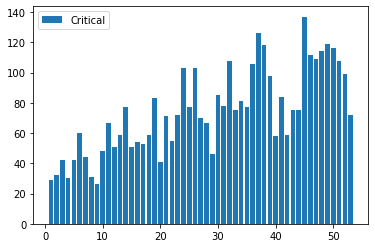

In [78]:
plt.bar(column1_labels,list_of_lists_transpose[i],label=str(column2_labels[i]))
plt.legend()

In [82]:
len(column1_labels)

53

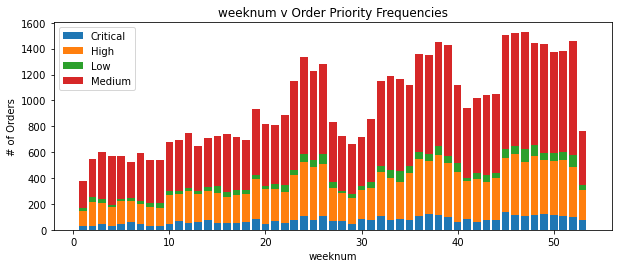

In [85]:



list_of_lists_transpose = list(map(list, itertools.zip_longest(*list_of_lst, fillvalue=None)))



bottom = [0] * len(list_of_lists_transpose[0])
used=[]
fig = plt.figure(figsize=(10,6))

for i in range(len(column2_labels)):
    plt.bar(column1_labels,list_of_lists_transpose[i],bottom=bottom,label=str(column2_labels[i]))
    used.append(list_of_lists_transpose[i])
    bottom = [sum(x) for x in zip(*used)]

plt.xlabel(str(column1))
plt.ylabel('# of Orders')
plt.title(str(column1) +' v ' +str(column2) +' Frequencies')
plt.legend()
fig.subplots_adjust(bottom=0.4)
filepath = 'static' + '\\timeFreqBarChart1.png'
plt.savefig(filepath)

        


'static\\freqBarChart1.png'

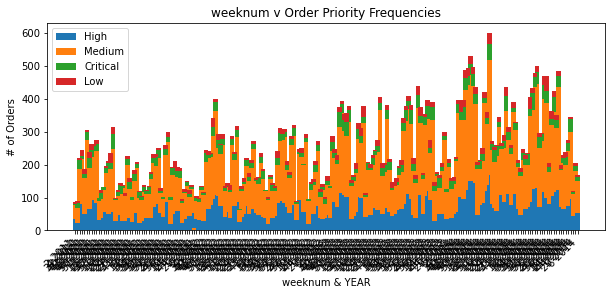

In [38]:
get_2D_freq_stacked_bar(column1='weeknum',column2='Order Priority',engine=engine)

In [88]:

def get_time_freq_bar_chart_all(time_selection,column,year,engine,filename='time_chart2.png'):

    time_selection = 'weeknum'
    column = 'Order Priority'
    year = 2001



    column_values = []
    time_selection_values=[]
    query_str = 'SELECT DISTINCT `' + str(column) + '` FROM timeDimension;'
    res = engine.execute(query_str).fetchall()
    for item in res:
        column_values.append(item[0])

    query_str = 'SELECT DISTINCT `' + str(time_selection) + '` FROM timeDimension ORDER BY `' +str(time_selection) + '` ASC'
    res = engine.execute(query_str).fetchall()
    for item in res:
        time_selection_values.append(item[0])
    #print(column_values,time_selection_values)   


    column1=time_selection
    column2=column
    column1_labels=time_selection_values
    column2_labels=column_values
    data_dict = {}

    for i in range(len(column1_labels)):
        for j in range(len(column2_labels)):
            

            query = 'SELECT COUNT(`' + str(column1) + '`) '
            query += 'FROM timeDimension WHERE `' +str(column2)+'`= \'' + str(column2_labels[j])+ '\' AND `' +str(column1)+'`= \'' + str(column1_labels[i])+'\''
            #print(query)
        
            #print(query)
            res = engine.execute(query).fetchall()
            #print(res[0][0])
            data_dict[ str(column1_labels[i]) + ' ' + str(column2_labels[j])] = res[0][0]


    #print(data_dict)


    lst=[]
    list_2011_2014 = []
    list_of_lst = []
    used=[]
    x_labels = column2_labels
    #print(x_labels)
    for i in range(len(column1_labels)):
        lst=[]
        for j in range(len(column2_labels)):
            lst.append(data_dict[str(column1_labels[i]) + ' ' +str(column2_labels[j])])
        list_of_lst.append(lst)
        
        #print(lst)

    #list_of_lst




    list_of_lists_transpose = list(map(list, itertools.zip_longest(*list_of_lst, fillvalue=None)))



    bottom = [0] * len(list_of_lists_transpose[0])
    used=[]
    fig = plt.figure(figsize=(10,6))

    for i in range(len(column2_labels)):
        plt.bar(column1_labels,list_of_lists_transpose[i],bottom=bottom,label=str(column2_labels[i]))
        used.append(list_of_lists_transpose[i])
        bottom = [sum(x) for x in zip(*used)]

    plt.xlabel(str(column1))
    plt.ylabel('# of Orders')
    plt.title(str(column1) +' v ' +str(column2) +' Frequencies, ALL TIME')
    plt.legend()
    fig.subplots_adjust(bottom=0.4)
    filepath = 'static' + '\\' + filename
    plt.savefig(filepath)
    return filepath

        


